# Reading the file

Importing the necessary packages

In [4]:
import pandas as pd

Reading the file as a CSV

In [5]:
df1 = pd.read_csv('Building_Permits_S.csv', index_col=0)
print(df1.head())

<ipython-input-5-4fba7191de42>:1: DtypeWarning: Columns (23,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('Building_Permits_S.csv', index_col=0)


  Permit Number  Permit Type  Permit Type Definition Permit Creation Date  \
0       M871747            8  otc alterations permit           2018-01-02   
1  201801027649            8  otc alterations permit           2018-01-02   
2  201801027679            8  otc alterations permit           2018-01-02   
3  201801027692            8  otc alterations permit           2018-01-02   
4  201801027696            8  otc alterations permit           2018-01-02   

  Block  Lot  Street Number Street Number Suffix Street Name Street Suffix  \
0  6511  028           1141                  NaN     Dolores            St   
1  0127  138            999                  NaN       Green            St   
2  0080  031            101                  NaN     Lombard            St   
3  1848  046           1420                  NaN        06th            Av   
4  0669  009           1156                  NaN      Sutter            St   

   ...  Primary Address Flag Supervisor District  \
0  ...          

# What is decision tree and how the depth works

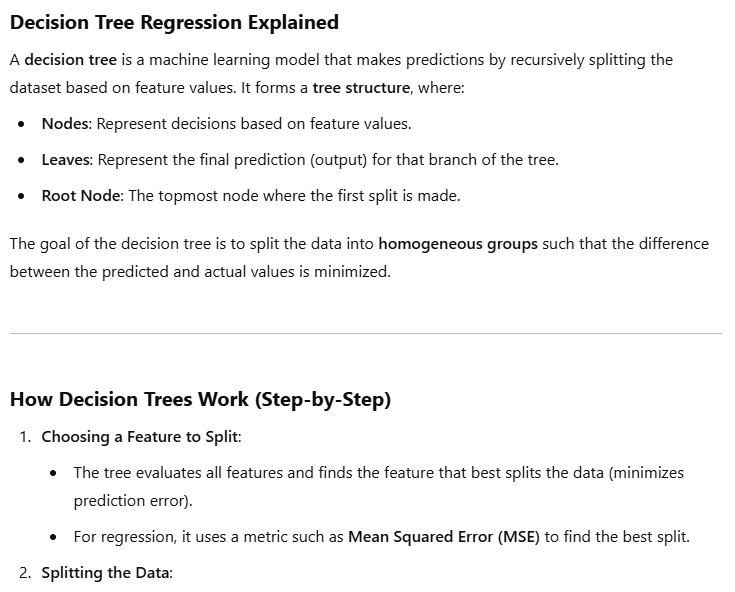

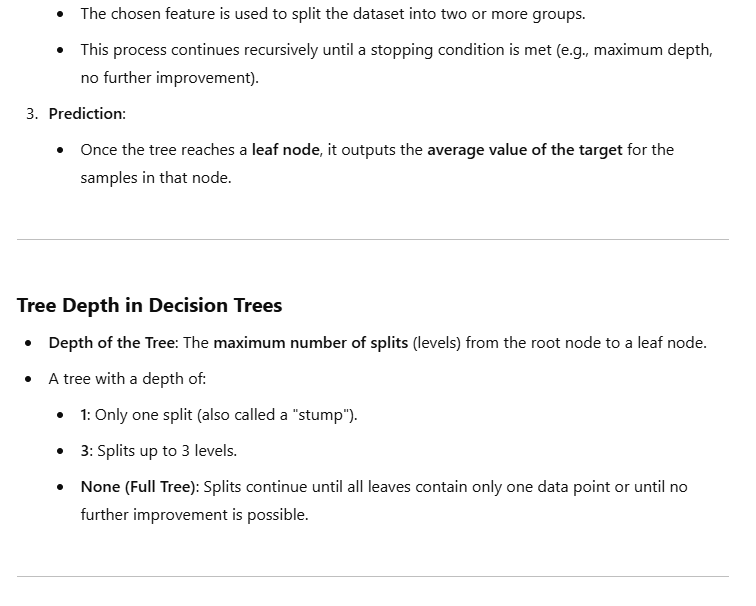

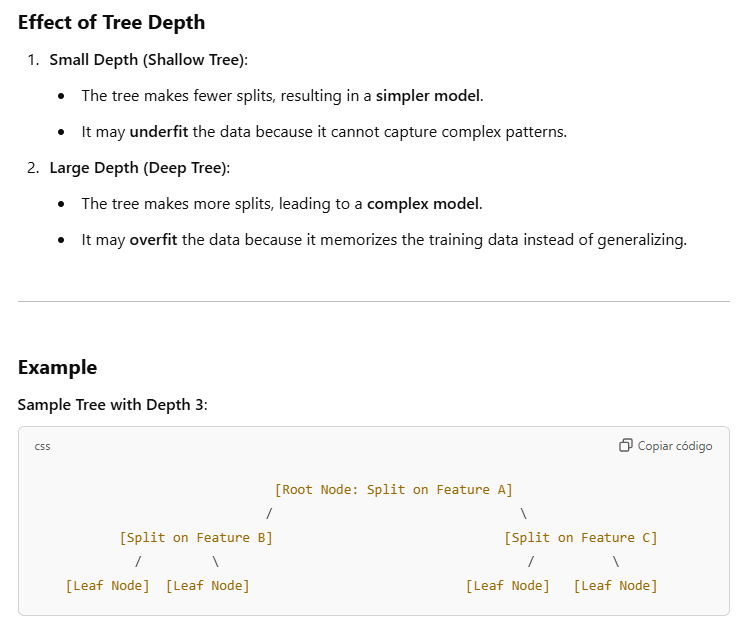

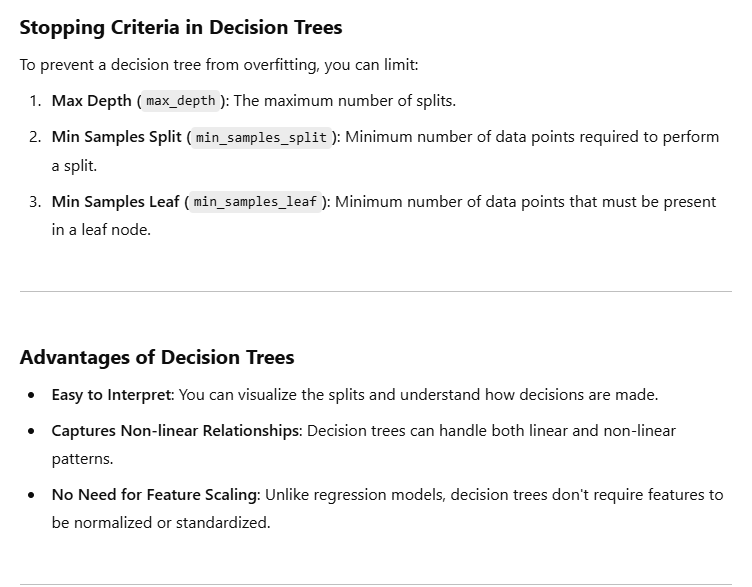

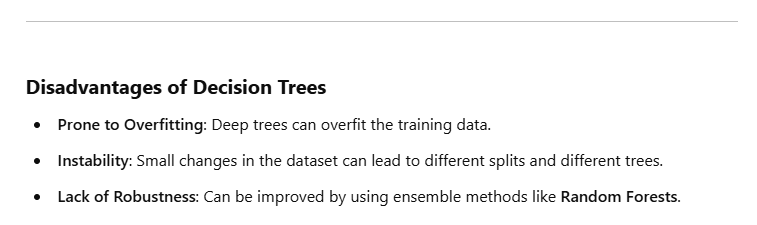

# Decision tree - Multiple feature combinations

Import the necessary libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

Filling missing values in the dataset (with 0)

In [7]:
df1.fillna(0, inplace=True)

Defining the target and combinations of features

In [8]:
target_column = 'Days_to_Issue'
feature_combinations = [
    ['Existing Construction Type'],
    ['Permit Type'],
    ['Existing Construction Type', 'Permit Type'],
    ['Permit Creation Month'],
    ['Existing Construction Type', 'Permit Creation Month'],
    ['Existing Construction Type', 'Permit Type', 'Permit Creation Month']
]

Ensuring Permit Creation Month exists

In [9]:
if 'Permit Creation Month' not in df1.columns:
    df1['Permit Creation Month'] = pd.to_datetime(df1['Permit Creation Date']).dt.month

Splitting the data into training and validation sets

In [10]:
X = df1.drop(columns=[target_column])
y = df1[target_column]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

Define max_depth values to test for the Decision Tree. None means no depth limit (fully grown tree)

In [11]:
max_depth_values = [3, 5, 10, None]

Initializing the decision tree model
*   Looping through feature combinations and polynomial degrees
*   Making predictions and calculating the r2 score

In [12]:
results = []

for features in feature_combinations:
    X_train_subset = X_train[features]
    X_valid_subset = X_valid[features]

    for max_depth in max_depth_values:
        # Decision Tree Regressor with different max depths
        model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        model.fit(X_train_subset, y_train)

        # Make predictions and calculate R² score
        predictions = model.predict(X_valid_subset)
        score = r2_score(y_valid, predictions)

        # Append results
        results.append({
            "Feature Combination": str(features),  # Convert list to string for readability
            "Max Depth": max_depth if max_depth is not None else "Full Tree",
            "R² Score": score
        })

Converting results to dataframe

In [13]:
results_df = pd.DataFrame(results)
print("\nPerformance of Decision Tree Regression for Different Feature Combinations and Depths:")
print(results_df.sort_values(by=["Feature Combination", "Max Depth"], ascending=True))


Performance of Decision Tree Regression for Different Feature Combinations and Depths:
                                  Feature Combination  Max Depth  R² Score
16  ['Existing Construction Type', 'Permit Creatio...          3  0.016978
17  ['Existing Construction Type', 'Permit Creatio...          5  0.017880
18  ['Existing Construction Type', 'Permit Creatio...         10  0.016969
19  ['Existing Construction Type', 'Permit Creatio...  Full Tree  0.016969
20  ['Existing Construction Type', 'Permit Type', ...          3  0.246401
21  ['Existing Construction Type', 'Permit Type', ...          5  0.257336
22  ['Existing Construction Type', 'Permit Type', ...         10  0.259144
23  ['Existing Construction Type', 'Permit Type', ...  Full Tree  0.257705
8       ['Existing Construction Type', 'Permit Type']          3  0.245371
9       ['Existing Construction Type', 'Permit Type']          5  0.257401
10      ['Existing Construction Type', 'Permit Type']         10  0.257655
11      ['Ex

Plotting the comparison chart

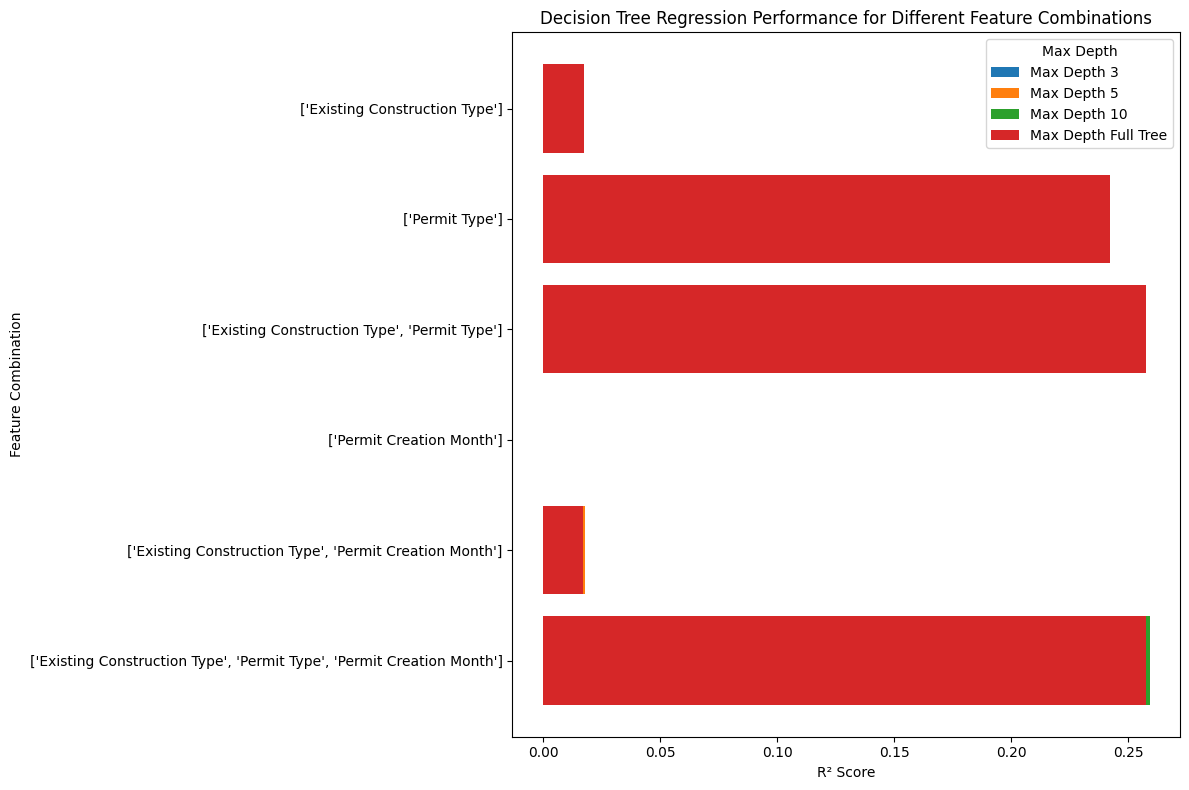

In [14]:
plt.figure(figsize=(12, 8))
for max_depth in max_depth_values:
    subset = results_df[results_df['Max Depth'] == (max_depth if max_depth is not None else "Full Tree")]
    plt.barh(subset['Feature Combination'], subset['R² Score'], label=f'Max Depth {max_depth if max_depth is not None else "Full Tree"}')

plt.xlabel("R² Score")
plt.ylabel("Feature Combination")
plt.title("Decision Tree Regression Performance for Different Feature Combinations")
plt.legend(title="Max Depth")
plt.gca().invert_yaxis()  # Show the best result at the top
plt.tight_layout()
plt.show()
